In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
reg_path = "all_registration.csv"
reg_header = ["day", "date", "time", "user_id", "action", "born", "phone", "country", "acquired_from"]
registration = pd.read_csv(reg_path, delimiter=';', names = reg_header)
registration["date"] = pd.to_datetime(registration["date"])

free_path = "all_free_tree.csv"
free_tree = pd.read_csv(free_path, delimiter=';', names =["day", "date", "user_id", "action"])

super_path = "all_super_tree.csv"
super_tree = pd.read_csv(super_path, delimiter=';', names =["day", "date", "user_id", "action"])

In [3]:
reg_super = registration.merge(super_tree, how="inner", left_on="user_id", right_on="user_id")
super_sent_by_user = reg_super.groupby("user_id").count()[["acquired_from"]].rename(columns={"acquired_from": "super_sent"})
free_super_sent_users = super_sent_by_user[super_sent_by_user["super_sent"] == 1].reset_index()

paid_super_sent_users = super_sent_by_user.copy().rename(columns={"super_sent": "paid_super_sent"})
paid_super_sent_users["paid_super_sent"] = paid_super_sent_users["paid_super_sent"] - 1
paid_super_sent_users = paid_super_sent_users[paid_super_sent_users.paid_super_sent > 0].reset_index()

In [8]:
paid_super_sent_users

,user_id,paid_super_sent
0,1000010,5
1,1000011,1
2,1000022,2
3,1000026,1
4,1000037,2
...,...,...
40024,1284374,2
40025,1284385,2
40026,1284399,3
40027,1284411,2


In [137]:
revenue_by_day = paid_users.groupby("date")[["paid_super_sent"]].sum().reset_index().rename(columns={"paid_super_sent":"revenue"})
revenue_by_day = revenue_by_day[revenue_by_day.date != "2024-07-11"]
revenue_by_day

reg_users_country = registration.groupby("country").count()[["user_id"]].rename(columns={"user_id":"user_counts"})
reg_users_country

,user_counts
country,
brazil,64629
germany,25882
philippines,26028
sweden,39391
united_states,128492


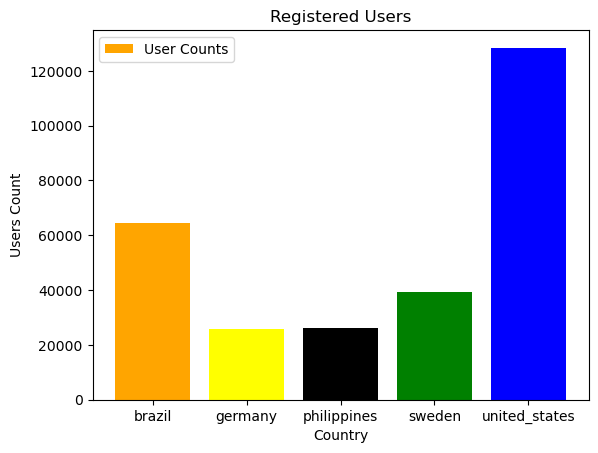

In [193]:
ruc = reg_users_country.reset_index()
x = ruc.country
y = ruc.user_counts
colors = ["orange","yellow","black","green","blue"]

plt.bar(x, y, label="User Counts", color=colors)
plt.xlabel("Country")
plt.ylabel("Users Count")
plt.title("Registered Users")
plt.legend()
plt.show()

In [195]:
active_users = registration.merge(free_tree, how="inner", left_on="user_id", right_on="user_id")
active_users = active_users.merge(paid_super_sent_users, how="left", left_on="user_id", right_on="user_id")
active_free_users = active_users[active_users.paid_super_sent.isna()].groupby("user_id").count()[["paid_super_sent"]].reset_index()

In [196]:
free_users = registration.merge(active_free_users, how="inner", left_on="user_id", right_on="user_id")
free_users_country = free_users.groupby("country")[["user_id"]].nunique().rename(columns={"user_id":"user_counts"})
free_users_country

,user_counts
country,
brazil,27410
germany,8741
philippines,19930
sweden,34330
united_states,92165


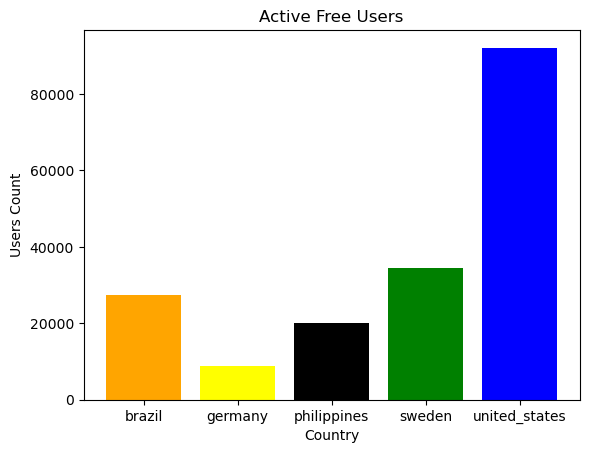

In [197]:
fuc = free_users_country.reset_index()
x = fuc.country
y = fuc.user_counts

colors = ["orange","yellow","black","green","blue"]

plt.bar(x, y, label="User Counts", color=colors)
plt.xlabel("Country")
plt.ylabel("Users Count")
plt.title("Active Free Users")
plt.show()

In [23]:
free_super_users = registration.merge(free_super_sent_users, how="inner", left_on="user_id", right_on="user_id")
free_super_users.groupby("country").nunique()[["user_id"]]

,user_id
country,
brazil,10352
philippines,369
sweden,2507
united_states,21379


In [129]:
paid_users = registration.merge(paid_super_sent_users, how="inner", left_on="user_id", right_on="user_id")
paid_users_country = paid_users.groupby("country").nunique()[["user_id"]].rename(columns={"user_id":"user_counts"})
paid_users_country

,user_counts
country,
brazil,16548
sweden,173
united_states,23308


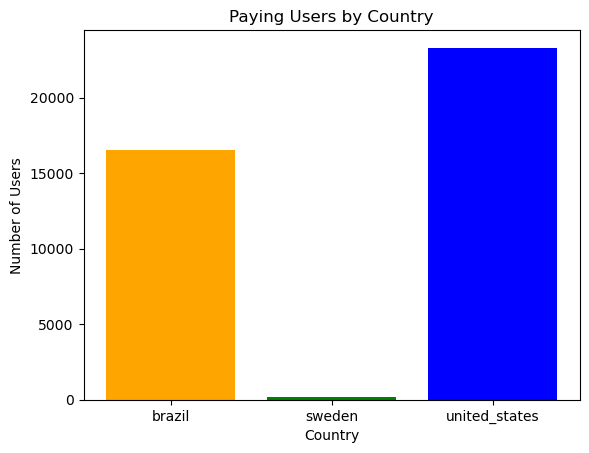

In [198]:
puc = paid_users_country.reset_index()
x = puc.country
y = puc.user_counts
colors = ["orange", "green", "b"]

plt.bar(x, y, label="User counts", color=colors)
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.title("Paying Users by Country")
plt.show()

In [200]:
paid_users = registration.merge(paid_super_sent_users, how="inner", left_on="user_id", right_on="user_id")
paid_users_born = paid_users.groupby(["born"]).nunique()[["user_id"]].rename(columns={"user_id":"user_counts"})
paid_users_born

,user_counts
born,
1987,375
1988,1826
1989,2098
1990,6802
1991,8442
1992,7725
1993,6527
1994,3563
1995,1594


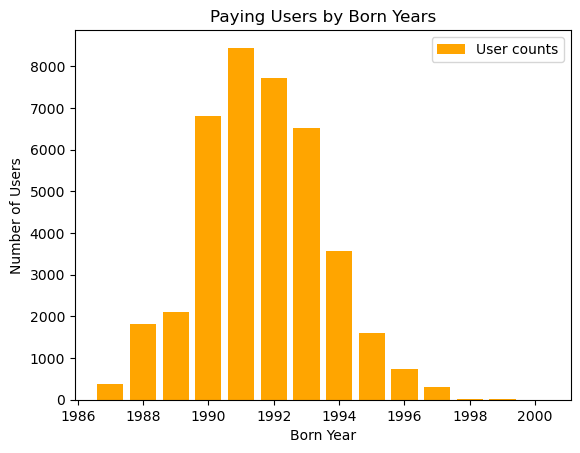

In [135]:
pub = paid_users_born.reset_index()
x = pub.born
y = pub.user_counts

plt.bar(x, y, label="User counts", color="orange")
plt.ylabel("Number of Users")
plt.xlabel("Born Year")
plt.title("Paying Users by Born Years")
plt.legend()
plt.show()

In [64]:
paid_source = paid_users.groupby("acquired_from")[["paid_super_sent"]].sum(numeric_only="True").reset_index()
paid_invite = paid_source[paid_source.acquired_from == "invite_a_friend"].rename(columns={"paid_super_sent": "revenue"})
paid_invite

,acquired_from,revenue
2,invite_a_friend,89129


In [29]:
paid_users.groupby("born")[["paid_super_sent"]].sum().rename(columns={"paid_super_sent": "revenue"})

,revenue
born,
1987,386
1988,2067
1989,2421
1990,11573
1991,22536
1992,23956
1993,25885
1994,8521
1995,2481


In [30]:
paid_users.groupby("phone")[["paid_super_sent"]].sum().rename(columns={"paid_super_sent": "revenue"})

,revenue
phone,
android,52153
error,46983
ios,2071


In [40]:
seg_paid_users = paid_users.groupby(["phone", "country", "acquired_from"])[["paid_super_sent"]].sum().rename(columns={"paid_super_sent": "revenue"}).reset_index()
seg_paid_users[(seg_paid_users.country == "brazil") & (seg_paid_users.acquired_from == "invite_a_friend") & (seg_paid_users.phone == "android")]

,phone,country,acquired_from,revenue
2,android,brazil,invite_a_friend,21908


In [5]:
# Create a color map from red to yellow
cmap = plt.get_cmap('autumn')  # 'autumn' colormap goes from red to yellow

# Generate 30 colors from the colormap
colors = [cmap(i/29) for i in range(30)]  # 29 because range goes from 0 to 29 (30 steps)

# Breaking it down
# colors = []
# for i in range(30):
#     fraction = i / 29  # Get a value between 0.0 and 1.0
#     color = cmap(fraction)  # Get the corresponding color from the colormap
#     colors.append(color)  # Add the color to the list

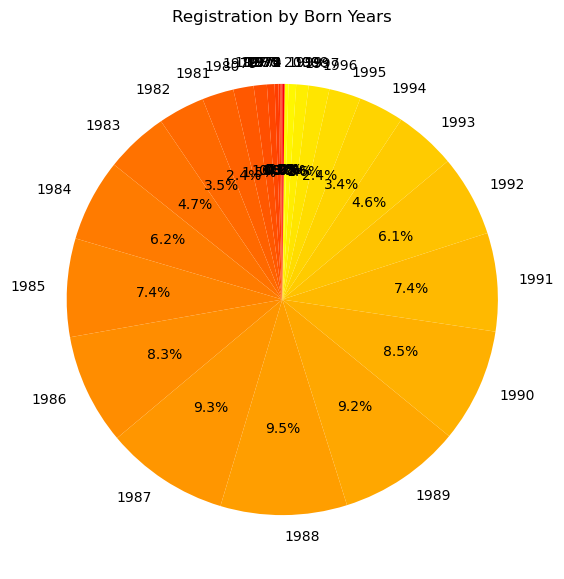

In [6]:
seg_born = registration.groupby("born").count()[["user_id"]].reset_index().rename(columns={"user_id":"user_count"})

sources = seg_born.born
numbers = seg_born.user_count
cmap = plt.get_cmap('autumn')
colors = [cmap(i/29) for i in range(30)]

plt.figure(figsize=(7,7))
plt.pie(numbers, labels=sources,
        colors=colors,
        startangle=90,
        #shadow=True,
        autopct="%1.1f%%"
        )

plt.title("Registration by Born Years")
plt.show()

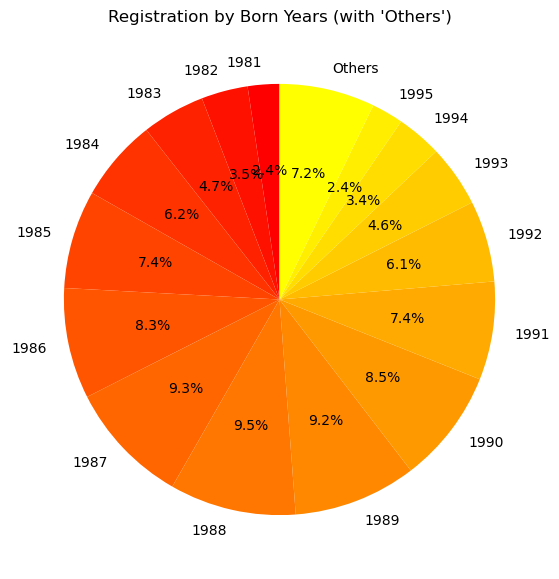

In [7]:
seg_born = registration.groupby("born").count()[["user_id"]].reset_index().rename(columns={"user_id":"user_count"})

sources = seg_born.born
numbers = seg_born.user_count

# Calculate the total number of users to compute percentages
total = sum(numbers)
threshold = 0.02  # 2% threshold

# Initialize lists to hold large categories and small ones
large_sources = []
large_numbers = []
small_count = 0

# Group small values into "Others"
for source, count in zip(sources, numbers):
    if count / total >= threshold:  # If the percentage is >= 2%
        large_sources.append(source)
        large_numbers.append(count)
    else:
        small_count += count  # Add small counts to the 'Others' category

# If there are small counts, add the "Others" category
if small_count > 0:
    large_sources.append("Others")
    large_numbers.append(small_count)

# Adjust the colormap and colors based on the new number of categories
cmap = plt.get_cmap('autumn')
colors = [cmap(i / (len(large_sources) - 1)) for i in range(len(large_sources))]

# Plot the pie chart with "Others" category
plt.figure(figsize=(7, 7))
plt.pie(large_numbers, labels=large_sources,
        colors=colors,
        startangle=90,
        autopct="%1.1f%%"
        )

plt.title("Registration by Born Years (with 'Others')")
plt.show()